In [179]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile,Aer, execute
from qiskit.circuit import QuantumRegister,ClassicalRegister
import qiskit.quantum_info as qi
import numpy as np
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

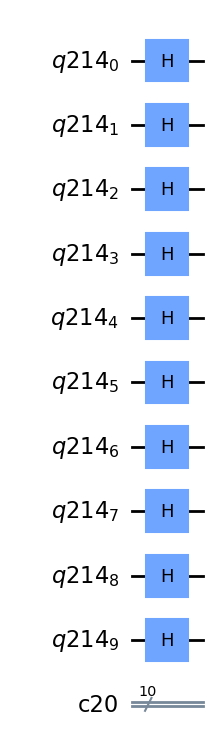

In [180]:
nb_qubits = 10
marked_qubit = '0101000000'
qr = QuantumRegister(nb_qubits)
cr = ClassicalRegister(nb_qubits)
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.draw()

In [181]:
def U_w(marked_qubit):
    n = len(marked_qubit)
    qc = QuantumCircuit(n)
    matrix = np.identity(2**n)
    i = int(marked_qubit, 2)
    matrix[i,i] = -1
    U_w = qi.Operator(matrix)
    #print(U_w)
    qc.unitary(U_w, [k for k in range(n)], label='U_w')
    U_w = qc.to_gate()
    U_w.name = "U$_w$"
    return U_w

In [182]:
def U_s(nb_qubits): #gate
    qr = QuantumRegister(nb_qubits)
    qc = QuantumCircuit(qr)
    qc.h(qr)
    U_0 = -np.identity(2**nb_qubits)
    U_0[0,0] = 1
    U_0 = qi.Operator(U_0)
    qc.unitary(U_0, [k for k in range(nb_qubits)], label='U_0')
    qc.h(qr)
    #print(qc)
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s
U = U_s(5)

In [183]:
iterable = [k for k in range(nb_qubits)]
optimal_num_iterations = int(np.floor(np.pi / 4 * np.sqrt(2**nb_qubits)))
print(optimal_num_iterations)
for i in range(optimal_num_iterations-1):
    qc.append(U_w(marked_qubit),iterable)
    qc.append(U_s(nb_qubits),iterable)
#qc.draw()

25


In [184]:
qc.measure(qr,cr)
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts(qc)

{'0011101000': 1, '0001110101': 1, '0100001100': 1, '0101000000': 1021}


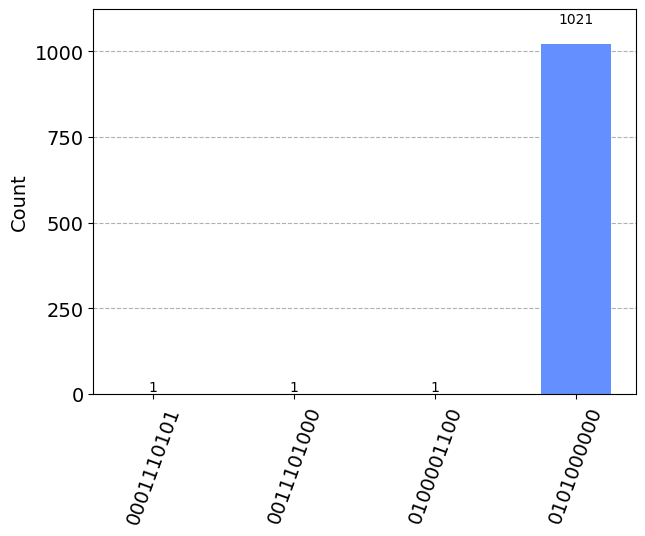

In [185]:
print(counts)
plot_histogram(counts)